In [13]:
import json
import pandas as pd

In [77]:
res = []
timeouts = [0.5, 0.75, 1, 5, 50, 100, 300, 600]
for timeout in timeouts:
    with open("results_{}.json".format(timeout), "r") as f:
        raw = json.load(f)
        raw['timeout'] = [timeout for i in raw['num_scenes']]
        res.append(pd.DataFrame(raw))
        
res = pd.concat(res)

res = res[res['mdl_name'] != "talent_model1-redundant.mzn"]

In [78]:
res['params'] = res['num_actors'].map(str) + ", " + res['num_scenes'].map(str)

In [61]:
res[res['sln_status']=='OPTIMAL_SOLUTION'].groupby(['timeout', 'num_scenes', 'num_actors'])['solve_time'].mean()

timeout  num_scenes  num_actors
0.75     8           10              0.100000
1.00     8           10              0.154667
5.00     8           10              0.099000
         9           11              0.818333
50.00    8           10              0.110667
         9           11              0.914333
         10          12             36.349500
100.00   8           10              0.086333
         9           11              0.793000
         10          12             34.050667
300.00   8           10              0.128667
         9           11              1.017333
         10          12             43.766333
         11          13            198.153500
600.00   8           10              0.119667
         9           11              0.822000
         10          12             33.923000
         11          13            201.643667
         12          14            510.989500
Name: solve_time, dtype: float64

In [17]:
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

0 talent_model1.mzn
1 talent_model2.mzn


c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_

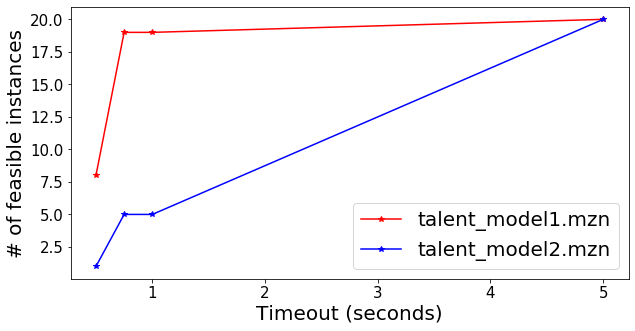

In [93]:
gph = plt.figure(figsize=(10,5))
feas_times = [0.25, 0.5, 0.75, 1, 5]
params = list(res['params'].unique())
num_instances_feas = [5*i for i in range(1,5)]

colors = ['r','b','g']

for i, mdl_name in enumerate(res.mdl_name.unique()):
    print(i, mdl_name)
    
    res_mdl = res[res['mdl_name'] == mdl_name]
    res_mdl = res_mdl[res_mdl['timeout'] <= max(feas_times)]
    
    num_feas = res_mdl.groupby(['timeout'])['obj'].count()
    
    plt.plot(num_feas.index, list(num_feas), "{}*-".format(colors[i]))
    
plt.legend(res.mdl_name.unique(), loc='lower right', fontsize= 20)
plt.xlabel("Timeout (seconds)", fontsize= 20)
plt.ylabel("# of feasible instances", fontsize= 20)
# gph.plot(res.groupby(["mdl_name", "timeout"]['obj'].count()), DF0.x, DF0.y, "r.--")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

0 talent_model1.mzn
1 talent_model2.mzn


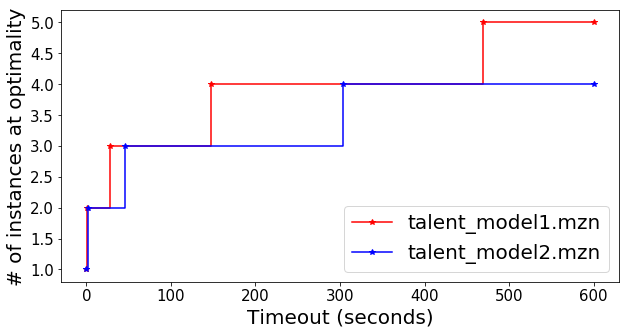

In [121]:
gph = plt.figure(figsize=(10,5))
feas_times = timeouts
params = list(res['params'].unique())
num_instances_feas = [5*i for i in range(1,5)]

colors = ['r','b','g']

for i, mdl_name in enumerate(res.mdl_name.unique()):
    print(i, mdl_name)
    
    res_mdl = res[res['mdl_name'] == mdl_name]
    res_mdl = res_mdl[res_mdl['sln_status'] == 'OPTIMAL_SOLUTION']
    res_mdl = res_mdl[res_mdl['timeout'] == max(timeouts)]
    solve_times = res_mdl['solve_time'].unique()
    counts = []
    for t in solve_times:
        counts.append(res_mdl[res_mdl['solve_time'] <= t].shape[0])
    
    plt.step(list(solve_times) + [600], counts + [counts[-1]], "{}*-".format(colors[i]), where='post')
    
plt.legend(res.mdl_name.unique(), loc='lower right', fontsize= 20)
plt.xlabel("Timeout (seconds)", fontsize= 20)
plt.ylabel("# of instances at optimality", fontsize= 20)
# gph.plot(res.groupby(["mdl_name", "timeout"]['obj'].count()), DF0.x, DF0.y, "r.--")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

0 talent_model1.mzn
1 talent_model2.mzn


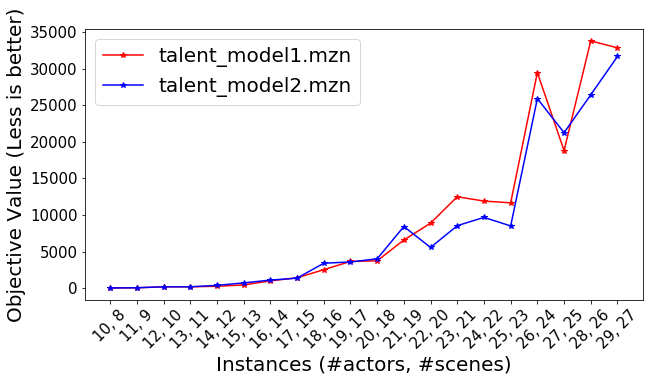

In [141]:
gph = plt.figure(figsize=(10,5))
feas_times = timeouts
params = list(res['params'].unique())
num_instances_feas = [5*i for i in range(1,5)]

colors = ['r','b','g']

for i, mdl_name in enumerate(res.mdl_name.unique()):
    print(i, mdl_name)
    
    res_mdl = res[res['mdl_name'] == mdl_name]
    res_mdl = res_mdl[res_mdl['timeout'] == max(timeouts)]
    solve_times = res_mdl['solve_time'].unique()
    counts = []
    for t in solve_times:
        counts.append(res_mdl[res_mdl['solve_time'] <= t].shape[0])
    
    plt.plot(list(res_mdl['params']), list(res_mdl['obj']), "{}*-".format(colors[i]))
    
plt.legend(res.mdl_name.unique(), loc='upper left', fontsize= 20)
plt.xlabel("Instances (#actors, #scenes)", fontsize= 20)
plt.ylabel("Objective Value (Less is better)", fontsize= 20)
# gph.plot(res.groupby(["mdl_name", "timeout"]['obj'].count()), DF0.x, DF0.y, "r.--")
plt.xticks(rotation = 45)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

0 talent_model1.mzn
1 talent_model2.mzn


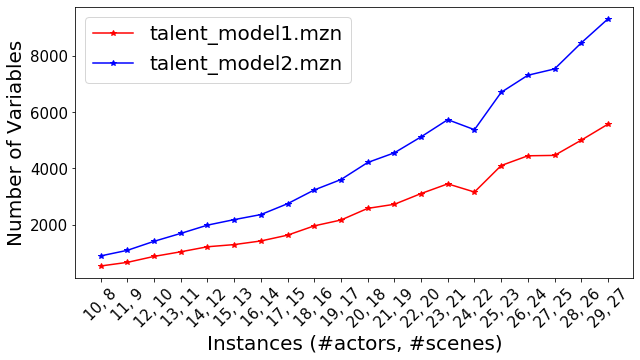

In [145]:
gph = plt.figure(figsize=(10,5))
feas_times = timeouts
params = list(res['params'].unique())
num_instances_feas = [5*i for i in range(1,5)]

colors = ['r','b','g']

for i, mdl_name in enumerate(res.mdl_name.unique()):
    print(i, mdl_name)
    
    res_mdl = res[res['mdl_name'] == mdl_name]
    res_mdl = res_mdl[res_mdl['timeout'] == max(timeouts)]
    solve_times = res_mdl['solve_time'].unique()
    counts = []
    for t in solve_times:
        counts.append(res_mdl[res_mdl['solve_time'] <= t].shape[0])
    
    plt.plot(list(res_mdl['params']), list(res_mdl['num_vars']), "{}*-".format(colors[i]))
    
plt.legend(res.mdl_name.unique(), loc='upper left', fontsize= 20)
plt.xlabel("Instances (#actors, #scenes)", fontsize= 20)
plt.ylabel("Number of Variables", fontsize= 20)
# gph.plot(res.groupby(["mdl_name", "timeout"]['obj'].count()), DF0.x, DF0.y, "r.--")
plt.xticks(rotation = 45)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

In [132]:
res

,num_scenes,num_actors,obj,init_time,solve_time,num_vars,sln_status,instance_name,scene_order,mdl_name,timeout,params
0,9,11,162,0.012,0.018,662,SATISFIED,input_11_9_6_5.json,"[8, 7, 4, 6, 1, 3, 2, 5, 9]",talent_model1.mzn,0.5,"11, 9"
1,10,12,309,0.015,0.063,873,SATISFIED,input_12_10_7_6.json,"[9, 8, 6, 5, 1, 4, 2, 7, 3, 10]",talent_model1.mzn,0.5,"12, 10"
2,11,13,389,0.029,0.076,1037,SATISFIED,input_13_11_8_7.json,"[10, 9, 8, 7, 3, 6, 1, 2, 5, 4, 11]",talent_model1.mzn,0.5,"13, 11"
3,12,14,598,0.032,0.057,1215,SATISFIED,input_14_12_9_8.json,"[11, 10, 9, 8, 7, 1, 3, 2, 6, 5, 4, 12]",talent_model1.mzn,0.5,"14, 12"
4,14,16,1711,0.025,0.020,1421,SATISFIED,input_16_14_11_10.json,"[13, 12, 11, 10, 9, 8, 7, 6, 4, 2, 5, 3, 1, 14]",talent_model1.mzn,0.5,"16, 14"
...,...,...,...,...,...,...,...,...,...,...,...,...
55,23,25,8499,0.125,598.529,6694,SATISFIED,input_25_23_20_19.json,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20...",talent_model2.mzn,600.0,"25, 23"
56,24,26,25931,0.105,598.563,7301,SATISFIED,input_26_24_21_20.json,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",talent_model2.mzn,600.0,"26, 24"
57,25,27,21262,0.127,598.489,7524,SATISFIED,input_27_25_22_21.json,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",talent_model2.mzn,600.0,"27, 25"
58,26,28,26452,0.111,598.427,8449,SATISFIED,input_28_26_23_22.json,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",talent_model2.mzn,600.0,"28, 26"
